# Clustering K-Means

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot

## Importar datos

In [ ]:
file = '/content/DataSetMuestraProyectoKL_v2.txt'
data = pd.read_csv(file,sep='|',encoding='UTF-8', error_bad_lines=False)
data = data.replace(np.nan,'0')
data.head()

,EPS,cmdcuentamedica,prsIDPrestacion,dprIDDetallePrestacion,cmdPrefijoFactura,cmdNumeroFactura,PrNumFactu1,PrNumFactu2,cmdFchEmisionFactura,cmdfchradicacion,cmdTotalFactura,FAC_FECH,FAC_ESTA,FAC_VATO,FecPagoReciente,ValTotalPago,cmdTotalIva,cmdTotalReteFuente,cmdTotalReteIca,cmdTotalICO,idEstadoCuenta,NombreEstadoCuenta,cafRadOtroOperador,idAmbito,NombreAmbito,idCobertura,NombreCobertura,prsFchEntrada,prsFchSalida,dprvlrproducto,dprcantproducto,ValorTotalDetalle,dprVlrCopago,dprVlrModeradora,prsgrabada,prsVistoBueno,prsFechaVistoBueno,IdAfiliado,FechaNacimiento,Genero,...,DANEAfiliado,FechaRadicacion,FechaAfiliacion,FechaRetiro,EstadoAfiliacion,DescripcionEstado,RazonEstadoAfiliacion,DescripcionRazon,EstadoBDUA,Cohorte,IdTipoAfiliado,TipoAfiliado,Edad,idGrupoEtareo,NombreGrupoEtareo,idTipoProducto,NombreTipoProducto,CodigoServicio,DescripcionServicio,Tipo_Cod,Codigo,Descripcion_Cups_Cum,Seccion,Servicio,Agrupador2NTP,Especialidad,prsTipoAtencion,tatDescAtencion,idTipoCuenta,NombreTipoCuenta,esContratoEspecial,idNit,CodigoDANEDeptoMunPrestador,dxIDHomolDiag,dxDescripcion,sss1,sss2,ssd1,ssd2,ValUnitAt
0,3,5015177,10935210,34080638,FE,1833,FE1833,FE1833,2020-12-30 00:00:00,2021-01-20 17:24:08.847000000,2022881,2021-02-01,A,2.02288e+06,2021-02-05,1705361,0,0,0,0,102,Contabilizada,0,3,Hospitalario,1,PBS,2020-12-07 00:00:00,2020-12-25 00:00:00,3250,"5,00","16250,00",",00",",00",1,1,2021-01-25 12:27:19.707000000,5.08739e+06,1943-12-02,2,...,17524,2017-08-01 00:00:00,2017-08-01 00:00:00,0,1,Vigentes,1,Al dia - empleador pago al dia,AC,RESPIRATORIO / CARDIOMETABOLICO,6,Cabeza Flia Subsidiado,77,14,De 75 a?os y mayores,1,Medicamento,325763,SODIO CLORURO 0.45% SOLUCION INYECTABLE BOLSA ...,CUM,19942695-2,SODIO CLORURO 045 %,0,MEDICAMENTOS,0,NO APLICA,44,Medicamentos Ambulatorios I Nivel,2,Por Evento,False,702,17001,J441,Enfermedad pulmonar obstructiva cronica con ex...,False,False,False,False,False
1,1,15612717,37049102,122636975,0,904882,904882,904882,2020-08-28 00:00:00,2020-09-11 10:11:26.273000000,76465,2020-09-11,A,76465,2020-09-28,76465,0,0,0,0,102,Contabilizada,0,2,Urgencia,1,PBS,2020-08-22 00:00:00,2020-09-11 00:00:00,28100,"1,00","28100,00",",00",",00",1,1,2020-09-12 00:22:12.100000000,4.30028e+06,2017-01-25,2,...,5154,2018-12-01 00:00:00,2017-08-01 00:00:00,2020-11-30 00:00:00,2,Retirados,2,Traslado a otra EPS,AC,0,2,Beneficiario,4,2,De 1 a 4 a?os,2,Procedimiento,2585,CONSULTA DE URGENCIAS. POR MEDICINA GENERAL,CUPS,890701,CONSULTA DE URGENCIAS POR MEDICINA GENERAL,Secci?n 01 PROCEDIMIENTOS NO QUIR?RGICOS,URGENCIAS,CONSULTA DE URGENCIAS POR MEDICINA GENERAL,SERVICIO DE URGENCIAS,2,Urgencias,2,Por Evento,False,762,5154,S500,Contusion del codo,False,False,False,False,True
2,1,15612717,37049102,122636973,0,904882,904882,904882,2020-08-28 00:00:00,2020-09-11 10:11:26.273000000,76465,2020-09-11,A,76465,2020-09-28,76465,0,0,0,0,102,Contabilizada,0,2,Urgencia,1,PBS,2020-08-22 00:00:00,2020-09-11 00:00:00,240,"1,00","240,00",",00",",00",1,1,2020-09-12 00:22:12.100000000,4.30028e+06,2017-01-25,2,...,5154,2018-12-01 00:00:00,2017-08-01 00:00:00,2020-11-30 00:00:00,2,Retirados,2,Traslado a otra EPS,AC,0,2,Beneficiario,4,2,De 1 a 4 a?os,8,Insumo,281086,JERINGA DESECHABLE 5 ML,INS,0,JERINGA DESECHABLE 5 ML,0,INSUMOS,INSUMOS,NO APLICA,2,Urgencias,2,Por Evento,False,762,5154,S500,Contusion del codo,False,False,False,False,False
3,1,14219175,34622073,111847983,HDCS,3425458,HDCS3425458,HDCS3425458,2020-02-29 00:00:00,2020-03-16 13:10:05.360000000,49933,2020-08-01,A,49933,2020-08-26,49933,0,0,0,0,102,Contabilizada,0,2,Urgencia,1,PBS,2020-02-24 00:00:00,2020-02-29 00:00:00,119,"1,00","119,00",",00",",00",1,1,2020-08-18 16:11:54.483000000,4.74039e+06,1996-10-13,2,...,76736,2018-09-05 00:00:00,2018-09-05 00:00:00,2020-11-30 00:00:00,2,Retirados,2,Traslado a otra EPS,AC,0,6,Cabeza Flia Subsidiado,24,7,De 19 a 44 a?os (Mujeres),8,Insumo,14693,AGUJA HIPODERMICA DESECHABLE ESTERIL 18G x 1 1...,INS,0,AGUJA HIPODERMICA DESECHABLE ESTERIL 18G x 1 1...,0,I

In [ ]:
cols = ['EPS','cmdcuentamedica','prsIDPrestacion','dprIDDetallePrestacion','cmdFchEmisionFactura','cmdfchradicacion',
        'cmdTotalFactura','FAC_FECH','FAC_ESTA','FAC_VATO','FecPagoReciente','ValTotalPago','cmdTotalIva','cmdTotalReteFuente',
        'cmdTotalReteIca','cmdTotalICO','idEstadoCuenta','idAmbito','idCobertura','prsFchEntrada','prsFchSalida',
        'dprvlrproducto','dprcantproducto','ValorTotalDetalle','dprVlrCopago','dprVlrModeradora','prsgrabada','prsVistoBueno',
        'prsFechaVistoBueno','IdAfiliado','FechaNacimiento','Genero','DANEAfiliado','FechaRadicacion','FechaAfiliacion',
        'FechaRetiro','EstadoAfiliacion','RazonEstadoAfiliacion','EstadoBDUA','IdTipoAfiliado','Edad','idGrupoEtareo',
        'idTipoProducto','CodigoServicio','prsTipoAtencion','idTipoCuenta','esContratoEspecial','idNit',
        'CodigoDANEDeptoMunPrestador','dxIDHomolDiag']
data = data[cols]

In [ ]:
data.dtypes

EPS                             int64
cmdcuentamedica                 int64
prsIDPrestacion                 int64
dprIDDetallePrestacion          int64
cmdFchEmisionFactura           object
cmdfchradicacion               object
cmdTotalFactura                object
FAC_FECH                       object
FAC_ESTA                       object
FAC_VATO                       object
FecPagoReciente                object
ValTotalPago                   object
cmdTotalIva                     int64
cmdTotalReteFuente              int64
cmdTotalReteIca                 int64
cmdTotalICO                     int64
idEstadoCuenta                  int64
idAmbito                        int64
idCobertura                     int64
prsFchEntrada                  object
prsFchSalida                   object
dprvlrproducto                 object
dprcantproducto                object
ValorTotalDetalle              object
dprVlrCopago                   object
dprVlrModeradora               object
prsgrabada  

In [ ]:
#Covertir valores
data['cmdTotalFactura'] = data['cmdTotalFactura'].replace(",", ".",regex=True).astype('float')
data['ValTotalPago'] = data['ValTotalPago'].replace(",", ".",regex=True).astype('float')
data['dprvlrproducto'] = data['dprvlrproducto'].replace(",", ".",regex=True).astype('float')
data['dprcantproducto'] = data['dprcantproducto'].replace(",", ".",regex=True).astype('float')
data['ValorTotalDetalle'] = data['ValorTotalDetalle'].replace(",", ".",regex=True).astype('float')
data['dprVlrCopago'] = data['dprVlrCopago'].replace(",", ".",regex=True).astype('float')
data['dprVlrModeradora'] = data['dprVlrModeradora'].replace(",", ".",regex=True).astype('float')
data['FAC_VATO'] = data['FAC_VATO'].replace(",", ".",regex=True).astype('float')
data['IdAfiliado'] = data['IdAfiliado'].replace(",", ".",regex=True).astype('int')
data['Genero'] = data['Genero'].replace(",", ".",regex=True).astype('int')
data['DANEAfiliado'] = data['DANEAfiliado'].replace(",", ".",regex=True).astype('int')
data['EstadoAfiliacion'] = data['EstadoAfiliacion'].replace(",", ".",regex=True).astype('int')
data['RazonEstadoAfiliacion'] = data['RazonEstadoAfiliacion'].replace(",", ".",regex=True).astype('int')
data['IdTipoAfiliado'] = data['IdTipoAfiliado'].replace(",", ".",regex=True).astype('int')
data['Edad'] = data['Edad'].replace(",", ".",regex=True).astype('int')
data['idGrupoEtareo'] = data['idGrupoEtareo'].replace(",", ".",regex=True).astype('int')
data['idTipoProducto'] = data['idTipoProducto'].replace(",", ".",regex=True).astype('int')
data['prsTipoAtencion'] = data['prsTipoAtencion'].replace(",", ".",regex=True).astype('int')

In [ ]:
#Convertir fechas y texto a número
data['cmdFchEmisionFactura'] = encoder.fit_transform(data.cmdFchEmisionFactura.values)
data['cmdfchradicacion'] = encoder.fit_transform(data.cmdfchradicacion.values)
data['FAC_FECH'] = encoder.fit_transform(data.FAC_FECH.values)
data['FAC_ESTA'] = encoder.fit_transform(data.FAC_ESTA.values)
data['FecPagoReciente'] = encoder.fit_transform(data.FecPagoReciente.values)
data['prsFchEntrada'] = encoder.fit_transform(data.prsFchEntrada.values)
data['prsFchSalida'] = encoder.fit_transform(data.prsFchSalida.values)
data['prsFechaVistoBueno'] = encoder.fit_transform(data.prsFechaVistoBueno.values)
data['FechaNacimiento'] = encoder.fit_transform(data.FechaNacimiento.values)
data['FechaRadicacion'] = encoder.fit_transform(data.FechaRadicacion.values)
data['FechaAfiliacion'] = encoder.fit_transform(data.FechaAfiliacion.values)
data['FechaRetiro'] = encoder.fit_transform(data.FechaRetiro.values)
data['EstadoBDUA'] = encoder.fit_transform(data.EstadoBDUA.values)
data['esContratoEspecial'] = data['esContratoEspecial'].replace(",", ".",regex=True).astype('int')
data['dxIDHomolDiag'] = encoder.fit_transform(data.dxIDHomolDiag.values)

In [ ]:
data.dtypes

EPS                              int64
cmdcuentamedica                  int64
prsIDPrestacion                  int64
dprIDDetallePrestacion           int64
cmdFchEmisionFactura             int32
cmdfchradicacion                 int32
cmdTotalFactura                float64
FAC_FECH                         int32
FAC_ESTA                         int32
FAC_VATO                       float64
FecPagoReciente                  int32
ValTotalPago                   float64
cmdTotalIva                      int64
cmdTotalReteFuente               int64
cmdTotalReteIca                  int64
cmdTotalICO                      int64
idEstadoCuenta                   int64
idAmbito                         int64
idCobertura                      int64
prsFchEntrada                    int32
prsFchSalida                     int32
dprvlrproducto                 float64
dprcantproducto                float64
ValorTotalDetalle              float64
dprVlrCopago                   float64
dprVlrModeradora         

In [ ]:
# 10% del dataset original
data = data.sample(frac=0.1)
data = data.drop(['EPS'], axis=1)
data

,cmdcuentamedica,prsIDPrestacion,dprIDDetallePrestacion,cmdFchEmisionFactura,cmdfchradicacion,cmdTotalFactura,FAC_FECH,FAC_ESTA,FAC_VATO,FecPagoReciente,ValTotalPago,cmdTotalIva,cmdTotalReteFuente,cmdTotalReteIca,cmdTotalICO,idEstadoCuenta,idAmbito,idCobertura,prsFchEntrada,prsFchSalida,dprvlrproducto,dprcantproducto,ValorTotalDetalle,dprVlrCopago,dprVlrModeradora,prsgrabada,prsVistoBueno,prsFechaVistoBueno,IdAfiliado,FechaNacimiento,Genero,DANEAfiliado,FechaRadicacion,FechaAfiliacion,FechaRetiro,EstadoAfiliacion,RazonEstadoAfiliacion,EstadoBDUA,IdTipoAfiliado,Edad,idGrupoEtareo,idTipoProducto,CodigoServicio,prsTipoAtencion,idTipoCuenta,esContratoEspecial,idNit,CodigoDANEDeptoMunPrestador,dxIDHomolDiag
156599,4814832,10708396,33050240,330,23282,6734009.0,177,1,6734009.0,223,3398072.37,0,0,0,0,102,3,0,319,333,2819.0,9.0,25371.0,0.0,0.0,1,1,19159,6236891,18120,2,54001,1072,1548,0,1,1,1,7,0,1,1,256819,44,2,0,490,54001,1110
114366,15058594,36143261,118705357,14,13370,7317100.0,103,1,7317100.0,111,6068400.00,0,0,0,0,102,3,1,2,13,93600.0,1.0,93600.0,0.0,0.0,1,1,10649,3601449,7277,2,76834,763,13,153,2,2,0,2,52,9,2,1592,44,2,0,708,76001,465
96208,3860406,9460951,26996922,35,6691,6595650.0,168,1,6595650.0,189,5562550.00,0,0,0,0,102,3,1,26,33,3000.0,7.0,21000.0,0.0,0.0,1,1,18856,4994911,3035,2,54206,5,13,284,2,8,3,6,72,13,1,186409,22,2,0,563,54498,410
155312,3793805,9374371,26624124,41,5235,4698616.0,68,1,4698616.0,76,2278992.29,0,0,0,0,102,3,1,34,58,35400.0,1.0,35400.0,0.0,0.0,1,1,6809,5548065,4809,2,54001,5,13,0,1,1,1,6,63,11,2,1405,61,2,0,490,54001,2209
58909,4166295,9938855,29195489,132,12725,4660545.0,83,1,4660545.0,71,4005889.00,0,0,0,0,102,3,1,132,150,193.0,12.0,2316.0,0.0,0.0,1,1,6899,4920870,1389,2,73411,5,13,0,1,1,1,6,82,14,1,46807,44,2,0,397,73411,2257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51160,4025847,9696316,27908943,86,9049,6924148.0,86,1,6924148.0,119,1055232.00,0,0,0,0,102,3,1,53,89,804.0,12.0,9648.0,0.0,0.0,1,1,6984,6144221,16240,2,73001,535,862,266,2,2,0,7,12,3,1,229566,44,2,0,721,73001,645
117902,14533581,35209465,114181195,105,8213,119400000.0,51,1,119400000.0,0,0.00,0,0,0,0,102,3,1,61,89,0.0,1.0,0.0,0.0,0.0,1,1,3350,2236825,144,2,15516,5,13,0,1,3,1,1,94,14,2,47510,73,2,0,814,15001,1458
32940,13603980,33241594,106734849,35,2200,1068470.0,153,1,969470.0,169,932096.00,0,0,0,0,102,3,1,33,34,5743.0,1.0,5743.0,0.0,0.0,1,1,18381,3385146,12008,2,5154,871,1350,335,2,2,0,2,31,7,8,84046,60,2,0,361,23001,1781
24710,15805816,37338893,123920521,273,19765,6668507.0,177,1,6668507.0,198,4495907.00,0,0,0,0,102,3,1,266,272,71972.0,1.0,71972.0,0.0,0.0,1,1,19296,4766764,599,2,54001,403,660,0,1,1,1,1,88,14,1,14007,44,2,0,490,54001,1349


In [ ]:
scaler.fit(data)
dataK = scaler.transform(data)
dataK

array([[-0.7360701 , -0.99978307, -0.97303933, ..., -0.44618117,
         0.18195054, -0.28771895],
       [ 1.02434735,  0.92510057,  0.92020543, ...,  0.17121191,
         1.07953567, -1.16448945],
       [-0.90009072, -1.09418838, -1.10683651, ..., -0.23943945,
         0.2022278 , -1.23925283],
       ...,
       [ 0.77436811,  0.70550548,  0.65561993, ..., -0.81151927,
        -1.08282851,  0.62439424],
       [ 1.15275942,  1.01558473,  1.03547679, ..., -0.44618117,
         0.18195054,  0.0371619 ],
       [-1.24277793,  0.86066207,  0.82847189, ...,  0.59885575,
        -0.34844067,  0.86091837]])

## Método del codo para determinar K

In [ ]:
ks = []
k_inertias = []
for k in range (1,10):
    kmeans = KMeans(n_clusters=k).fit(data)
    k_inertia = kmeans.inertia_
    ks.append(k)
    k_inertias.append(k_inertia)

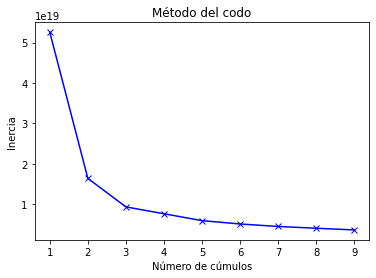

In [ ]:
plt.xlabel('Número de cúmulos')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.plot(ks, k_inertias, 'bx-');

In [ ]:
k = 3
model = KMeans(n_clusters=k)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
data['cluster'] = model.labels_
data

,cmdcuentamedica,prsIDPrestacion,dprIDDetallePrestacion,cmdFchEmisionFactura,cmdfchradicacion,cmdTotalFactura,FAC_FECH,FAC_ESTA,FAC_VATO,FecPagoReciente,ValTotalPago,cmdTotalIva,cmdTotalReteFuente,cmdTotalReteIca,cmdTotalICO,idEstadoCuenta,idAmbito,idCobertura,prsFchEntrada,prsFchSalida,dprvlrproducto,dprcantproducto,ValorTotalDetalle,dprVlrCopago,dprVlrModeradora,prsgrabada,prsVistoBueno,prsFechaVistoBueno,IdAfiliado,FechaNacimiento,Genero,DANEAfiliado,FechaRadicacion,FechaAfiliacion,FechaRetiro,EstadoAfiliacion,RazonEstadoAfiliacion,EstadoBDUA,IdTipoAfiliado,Edad,idGrupoEtareo,idTipoProducto,CodigoServicio,prsTipoAtencion,idTipoCuenta,esContratoEspecial,idNit,CodigoDANEDeptoMunPrestador,dxIDHomolDiag,cluster
156599,4814832,10708396,33050240,330,23282,6734009.0,177,1,6734009.0,223,3398072.37,0,0,0,0,102,3,0,319,333,2819.0,9.0,25371.0,0.0,0.0,1,1,19159,6236891,18120,2,54001,1072,1548,0,1,1,1,7,0,1,1,256819,44,2,0,490,54001,1110,0
114366,15058594,36143261,118705357,14,13370,7317100.0,103,1,7317100.0,111,6068400.00,0,0,0,0,102,3,1,2,13,93600.0,1.0,93600.0,0.0,0.0,1,1,10649,3601449,7277,2,76834,763,13,153,2,2,0,2,52,9,2,1592,44,2,0,708,76001,465,1
96208,3860406,9460951,26996922,35,6691,6595650.0,168,1,6595650.0,189,5562550.00,0,0,0,0,102,3,1,26,33,3000.0,7.0,21000.0,0.0,0.0,1,1,18856,4994911,3035,2,54206,5,13,284,2,8,3,6,72,13,1,186409,22,2,0,563,54498,410,0
155312,3793805,9374371,26624124,41,5235,4698616.0,68,1,4698616.0,76,2278992.29,0,0,0,0,102,3,1,34,58,35400.0,1.0,35400.0,0.0,0.0,1,1,6809,5548065,4809,2,54001,5,13,0,1,1,1,6,63,11,2,1405,61,2,0,490,54001,2209,0
58909,4166295,9938855,29195489,132,12725,4660545.0,83,1,4660545.0,71,4005889.00,0,0,0,0,102,3,1,132,150,193.0,12.0,2316.0,0.0,0.0,1,1,6899,4920870,1389,2,73411,5,13,0,1,1,1,6,82,14,1,46807,44,2,0,397,73411,2257,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51160,4025847,9696316,27908943,86,9049,6924148.0,86,1,6924148.0,119,1055232.00,0,0,0,0,102,3,1,53,89,804.0,12.0,9648.0,0.0,0.0,1,1,6984,6144221,16240,2,73001,535,862,266,2,2,0,7,12,3,1,229566,44,2,0,721,73001,645,0
117902,14533581,35209465,114181195,105,8213,119400000.0,51,1,119400000.0,0,0.00,0,0,0,0,102,3,1,61,89,0.0,1.0,0.0,0.0,0.0,1,1,3350,2236825,144,2,15516,5,13,0,1,3,1,1,94,14,2,47510,73,2,0,814,15001,1458,2
32940,13603980,33241594,106734849,35,2200,1068470.0,153,1,969470.0,169,932096.00,0,0,0,0,102,3,1,33,34,5743.0,1.0,5743.0,0.0,0.0,1,1,18381,3385146,12008,2,5154,871,1350,335,2,2,0,2,31,7,8,84046,60,2,0,361,23001,1781,1
24710,15805816,37338893,123920521,273,19765,6668507.0,177,1,6668507.0,198,4495907.00,0,0,0,0,102,3,1,266,272,71972.0,1.0,71972.0,0.0,0.0,1,1,19296,4766764,599,2,54001,403,660,0,1,1,1,1,88,14,1,14007,44,2,0,490,54001,1349,1


In [ ]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(data.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

#terms = data.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

In [ ]:
clusters = {0: 'Grupo 1',
            1: 'Grupo 2',
            2: 'Grupo 3'}

#data['nombres_clusters'] = data['cluster'].apply(lambda val: clusters[val])
df_centroids = pd.DataFrame(centroids)
df_centroids['cluster'] = clusters.values()

In [ ]:
pca = PCA(n_components=2)

result = pca.fit_transform(data)
result = pd.DataFrame(result)
result.columns = ['X','Y']
result['cluster'] = data.cluster.values
#result['texto'] = data.review_body.apply(lambda val: val[:140])

result.head()

,X,Y,cluster
0,-4.616579e+07,-4.815550e+06,0
1,4.369219e+07,-2.061837e+06,1
2,-5.239707e+07,-4.321790e+06,0
3,-5.271100e+07,-7.974420e+06,0
4,-5.008352e+07,-7.397691e+06,0


In [ ]:
colorsIdx = {0: 'blue',
             1: 'yellow',
             2: 'red'}

result['colores'] = result['cluster'].map(colorsIdx)

result.head()

,X,Y,cluster,colores
0,-4.616579e+07,-4.815550e+06,0,blue
1,4.369219e+07,-2.061837e+06,1,yellow
2,-5.239707e+07,-4.321790e+06,0,blue
3,-5.271100e+07,-7.974420e+06,0,blue
4,-5.008352e+07,-7.397691e+06,0,blue


In [ ]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   #text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)
                  ) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# COEFICIENTE SILUETA

In [ ]:
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(data)
print(cluster_labels)

[1 2 1 ... 2 2 2]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

For n_clusters = 2 The average silhouette_score is : 0.7537045559197451
For n_clusters = 3 The average silhouette_score is : 0.7824819009560942
For n_clusters = 4 The average silhouette_score is : 0.7462703832708485
For n_clusters = 5 The average silhouette_score is : 0.6932992622435978
For n_clusters = 6 The average silhouette_score is : 0.6751734508917188


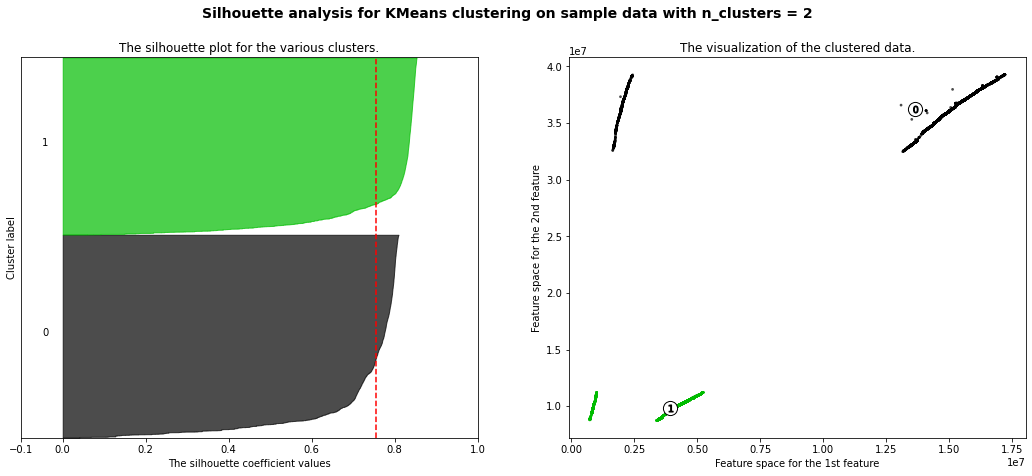

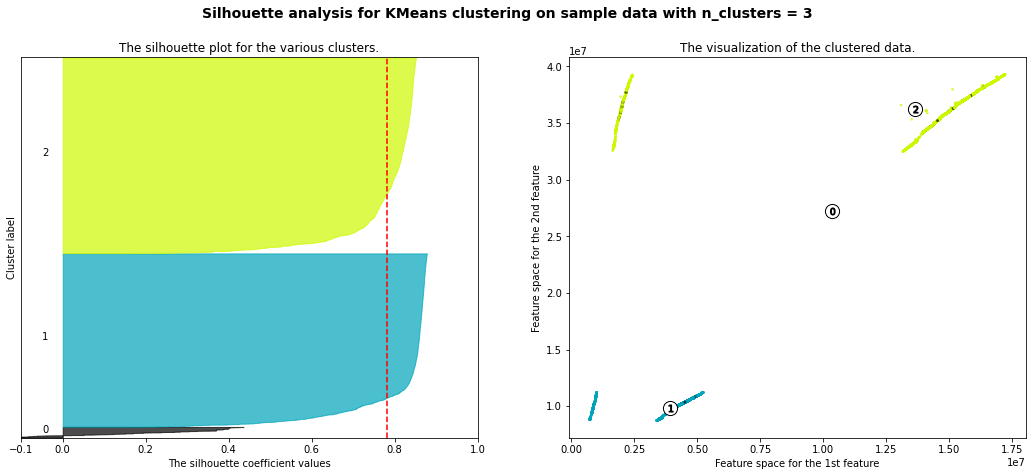

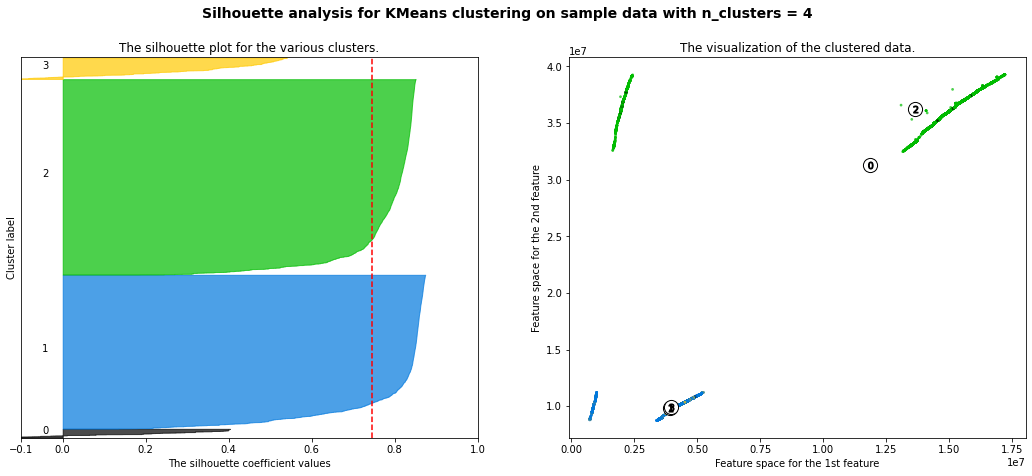

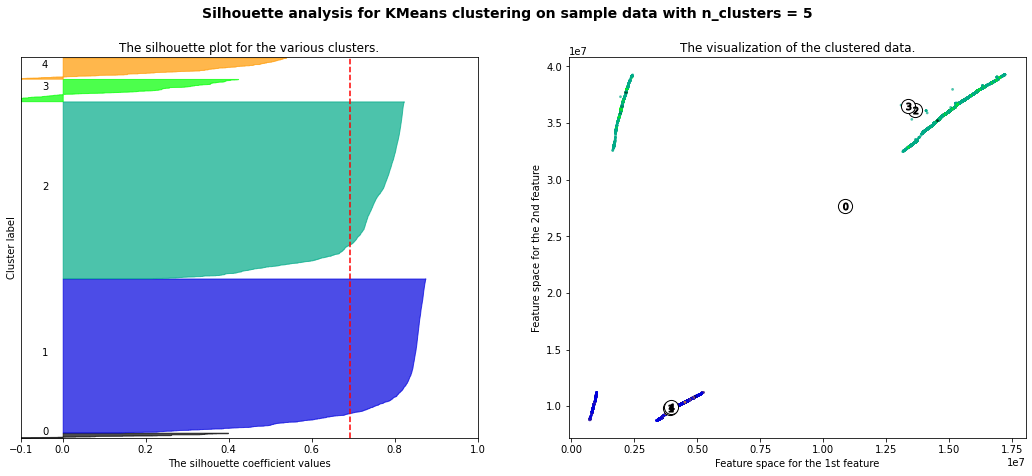

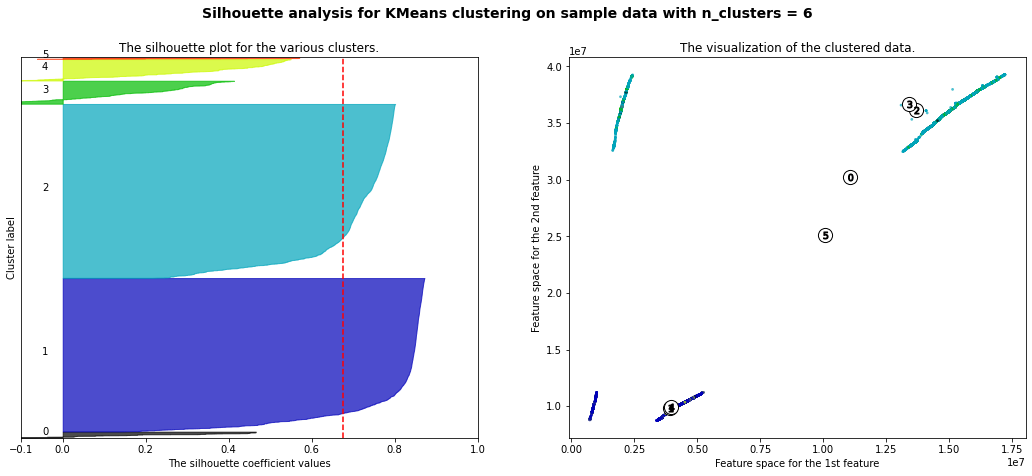

In [ ]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()